In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data

In [140]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [141]:
df.shape

(7043, 21)

In [142]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [144]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [145]:
df = df.drop("customerID", axis = 1)

In [146]:
df.shape #must be 20 after dropping the customerID column

(7043, 20)

In [147]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [148]:
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [149]:
nan_count = df['TotalCharges'].isna().sum()

In [150]:
nan_count / len(df) * 100

np.float64(0.1561834445548772)

In [151]:
#Safe to drop rows for missing TotalCharges -> 0.156 % of the dataset
original_size = len(df)
df = df.dropna(subset=['TotalCharges'])

In [152]:
new_size = len(df)
dropped_rows = original_size - new_size

In [153]:
print(f"Original dataset: {original_size} rows")
print(f"Dropped rows: {dropped_rows}")
print(f"New dataset: {new_size} rows")

Original dataset: 7043 rows
Dropped rows: 11
New dataset: 7032 rows


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [155]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [156]:
# Manually rename columns to snake_case from original PascalCase names
column_mapping = {
    'SeniorCitizen': 'senior_citizen',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'Contract': 'contract',
    'Churn': 'churn'
    # 'gender' and 'tenure' already in lowercase, no change needed
}

df.rename(columns=column_mapping, inplace=True)

# Verify the changes
print("Updated columns:")
print(df.columns.tolist())

Updated columns:
['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn']


In [157]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [160]:
df.duplicated().sum()

np.int64(22)

In [168]:
#They are representing different customers with identical attributes
df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
6491,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.20,69.20,Yes
6764,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.20,69.20,Yes
4495,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.10,Yes
6267,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.10,Yes
5522,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
5759,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
542,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
5170,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No
6774,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No


#EDA

##Check the Churn Distribution

In [171]:
df['churn'].value_counts()

,count
churn,
No,5163
Yes,1869


In [172]:
df['churn'].value_counts(normalize=True) * 100

,proportion
churn,
No,73.421502
Yes,26.578498


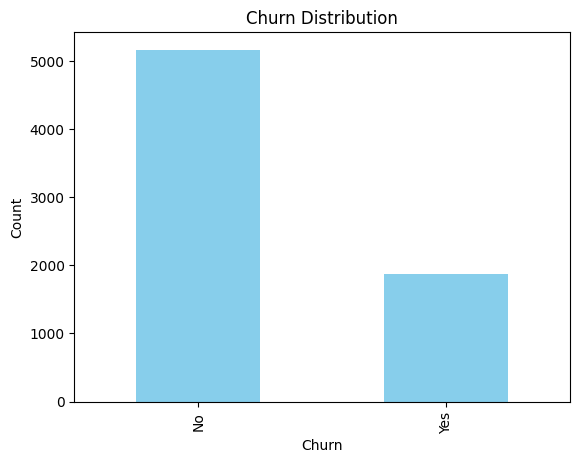

In [173]:
df['churn'].value_counts().plot(kind = 'bar', color = 'skyblue')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

- Not severely imbalanced (anything above 20% is workable)

- The dataset is usable as-is, but we may need techniques like class weights or SMOTE later

##Distributions of Numerical Features

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7032 non-null   object 
 1   senior_citizen     7032 non-null   int64  
 2   partner            7032 non-null   object 
 3   dependents         7032 non-null   object 
 4   tenure             7032 non-null   int64  
 5   phone_service      7032 non-null   object 
 6   multiple_lines     7032 non-null   object 
 7   internet_service   7032 non-null   object 
 8   online_security    7032 non-null   object 
 9   online_backup      7032 non-null   object 
 10  device_protection  7032 non-null   object 
 11  tech_support       7032 non-null   object 
 12  streaming_tv       7032 non-null   object 
 13  streaming_movies   7032 non-null   object 
 14  contract           7032 non-null   object 
 15  paperless_billing  7032 non-null   object 
 16  payment_method     7032 non-n

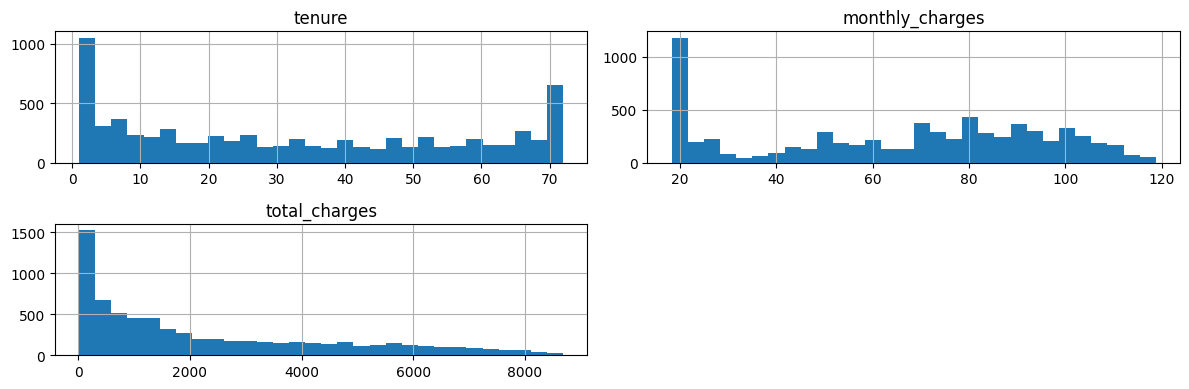

In [176]:
df[['tenure', 'monthly_charges', 'total_charges']].hist(bins=30, figsize=(12,4))
plt.tight_layout()
plt.show()

X-axis (horizontal): The values of the feature

For tenure: 0 to 72 months

For monthly_charges: ~18 dollar  to ~118 dollar

For total_charges: ~0 dollar to ~8,500 dollar

Y-axis (vertical): The count (frequency) - how many customers fall in that range

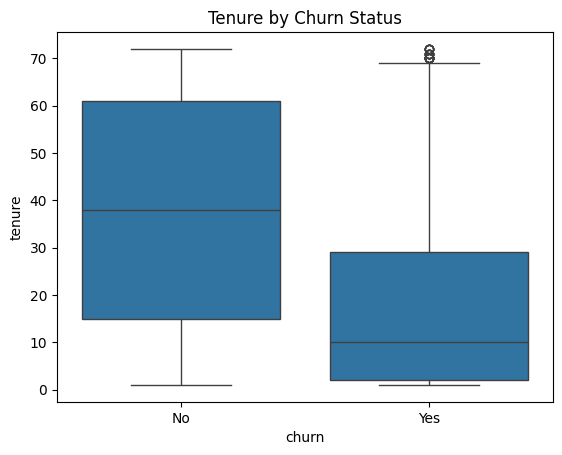

In [179]:
# Boxplot with seaborn
sns.boxplot(data=df, x='churn', y='tenure')
plt.title('Tenure by Churn Status')
plt.show()

Newer customers are much more likely to churn.

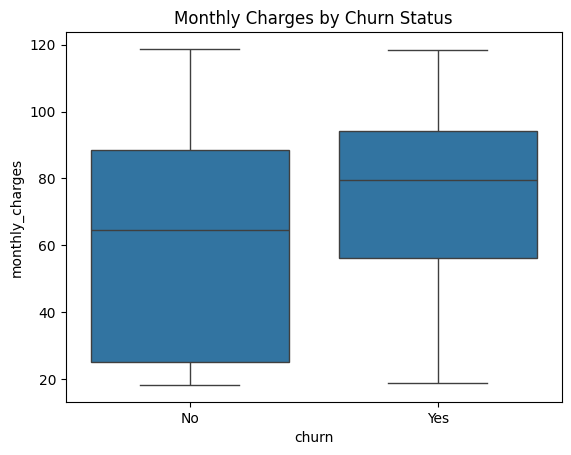

In [180]:
sns.boxplot(data=df, x='churn', y='monthly_charges')
plt.title('Monthly Charges by Churn Status')
plt.show()

Customers paying higher monthly charges are more likely to churn

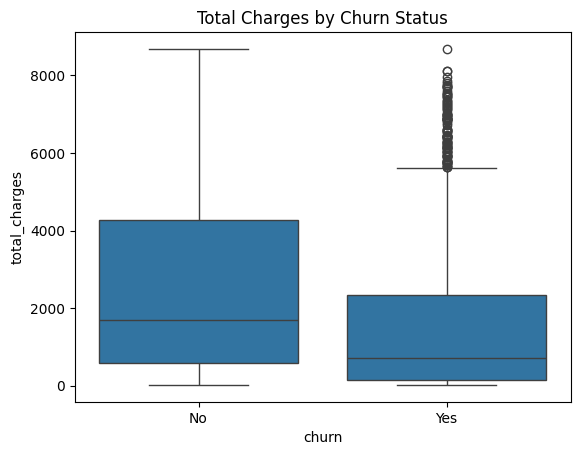

In [181]:
sns.boxplot(data=df, x='churn', y='total_charges')
plt.title('Total Charges by Churn Status')
plt.show()

Lower total charges = newer customers (low tenure) = higher churn risk.

##Categorical Features

In [184]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

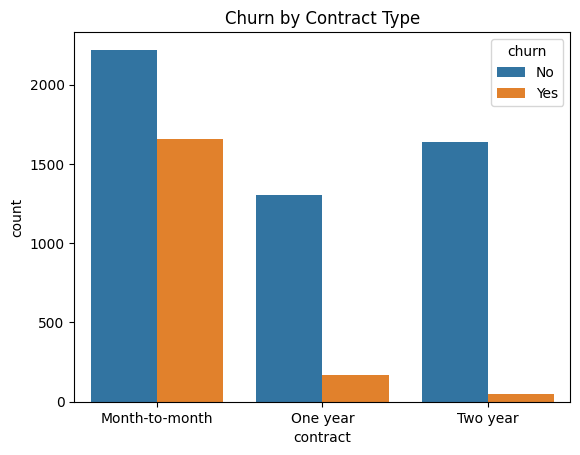

In [182]:
# Contract type vs churn
sns.countplot(data=df, x='contract', hue='churn')
plt.title('Churn by Contract Type')
plt.show()

 Month-to-month customers churn at 9x the rate of two-year contract customers.

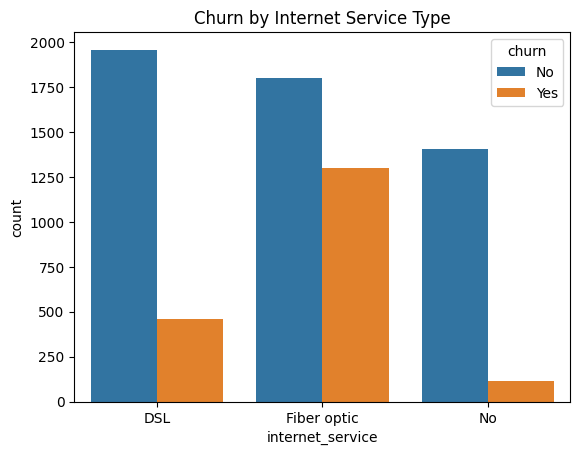

In [183]:
# Internet service vs churn
sns.countplot(data=df, x='internet_service', hue='churn')
plt.title('Churn by Internet Service Type')
plt.show()

Fiber optic customers churn at 5x the rate of non-internet customers

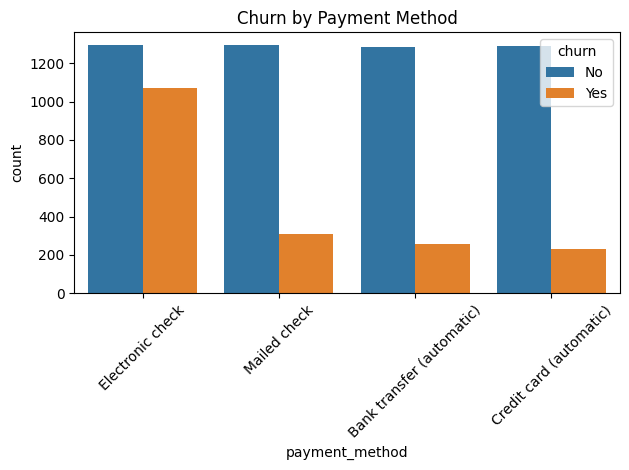

In [186]:
# Payment method vs churn
sns.countplot(data=df, x='payment_method', hue='churn')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Electronic check users churn 3x more than automatic payment users

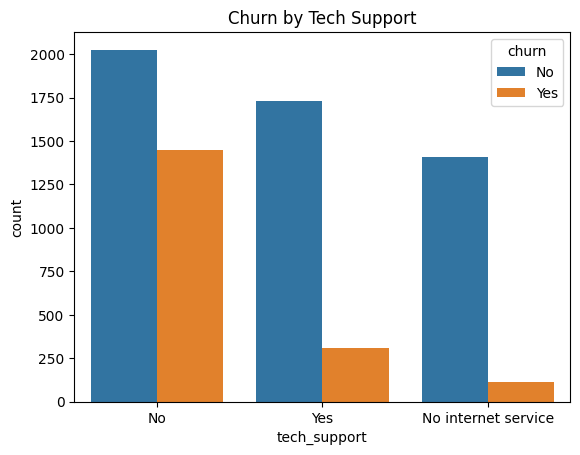

In [187]:
# Tech support vs churn
sns.countplot(data=df, x='tech_support', hue='churn')
plt.title('Churn by Tech Support')
plt.show()

Customers WITH tech support churn at less than half the rate! Support = retention.

Offering free/cheap tech support could significantly reduce churn.

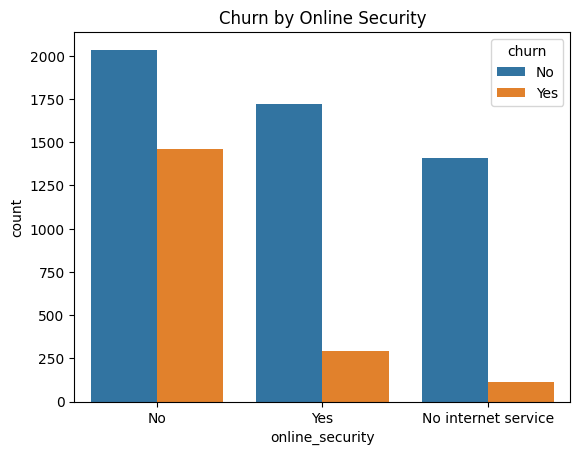

In [188]:
# Online security vs churn
sns.countplot(data=df, x='online_security', hue='churn')
plt.title('Churn by Online Security')
plt.show()

Add-on services (tech support, online security) strongly correlate with retention!

Customers who invest in additional services feel more committed and are less likely to leave.

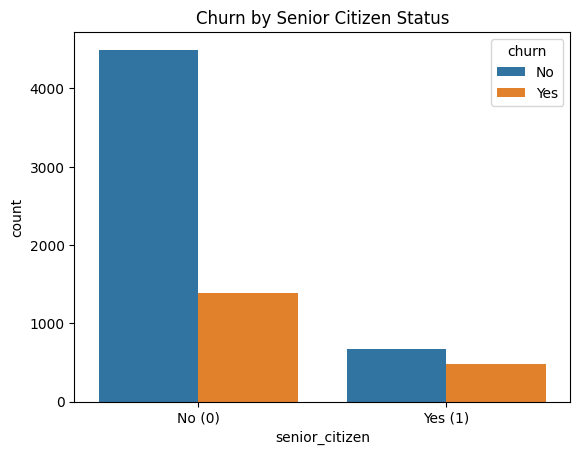

In [189]:
# Senior citizen vs churn
sns.countplot(data=df, x='senior_citizen', hue='churn')
plt.title('Churn by Senior Citizen Status')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

 Seniors churn at almost 2x the rate (42% vs 24%)

##Correlation Matrix for Numerical Features

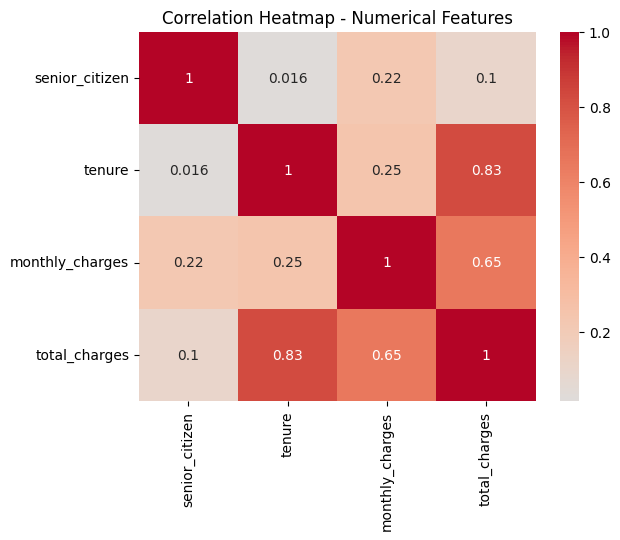

In [190]:
# Correlation matrix for numerical features
corr_matrix = df[['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Numerical Features')
plt.show()

The total_charges feature shows very high correlation (0.83) with tenure because it's essentially a derived feature (monthly_charges × tenure). Keeping highly correlated features can cause multicollinearity issues in our models and doesn't add new information since we already have both tenure and monthly_charges separately. Dropping it will make our model cleaner and easier to interpret without losing predictive power.

In [191]:
df = df.drop('total_charges', axis = 1)

In [193]:
df.shape #must be (7032,19) after dropping

(7032, 19)

##Unique Values for Categorical Columns

In [194]:
categorical_cols = df.select_dtypes(include = 'object').columns

for col in categorical_cols:
  print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['No' 'Yes']
phone_service: ['No' 'Yes']
multiple_lines: ['No phone service' 'No' 'Yes']
internet_service: ['DSL' 'Fiber optic' 'No']
online_security: ['No' 'Yes' 'No internet service']
online_backup: ['Yes' 'No' 'No internet service']
device_protection: ['No' 'Yes' 'No internet service']
tech_support: ['No' 'Yes' 'No internet service']
streaming_tv: ['No' 'Yes' 'No internet service']
streaming_movies: ['No' 'Yes' 'No internet service']
contract: ['Month-to-month' 'One year' 'Two year']
paperless_billing: ['Yes' 'No']
payment_method: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn: ['No' 'Yes']


#Model

##Train-Test Split

In [195]:
X = df.drop("churn", axis = 1)
y = df["churn"]

In [196]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [200]:
X_train.shape

(4922, 18)

In [202]:
X_test.shape

(2110, 18)

##Encoding

In [214]:
# Encode target variable: 'Yes'=1, 'No'=0
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
y_train_encoded = le_target.fit_transform(y_train)
y_test_encoded = le_target.transform(y_test)

print(f"Original y_train sample: {y_train[:5].values}")
print(f"Encoded y_train sample: {y_train_encoded[:5]}")
print(f"Classes mapping: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

Original y_train sample: ['Yes' 'No' 'No' 'Yes' 'No']
Encoded y_train sample: [1 0 0 1 0]
Classes mapping: {'No': np.int64(0), 'Yes': np.int64(1)}


In [215]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify column types
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])

# Step 3: Fit on training data and transform both sets
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

print(f"\nOriginal training shape: {X_train.shape}")
print(f"Encoded training shape: {X_train_encoded.shape}")
print(f"Encoded test shape: {X_test_encoded.shape}")

Categorical columns (15): ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method']
Numerical columns (3): ['senior_citizen', 'tenure', 'monthly_charges']

Original training shape: (4922, 18)
Encoded training shape: (4922, 29)
Encoded test shape: (2110, 29)


In [216]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=preprocessor.get_feature_names_out())
X_train_encoded_df

,cat__gender_Male,cat__partner_Yes,cat__dependents_Yes,cat__phone_service_Yes,cat__multiple_lines_No phone service,cat__multiple_lines_Yes,cat__internet_service_Fiber optic,cat__internet_service_No,cat__online_security_No internet service,cat__online_security_Yes,...,cat__streaming_movies_Yes,cat__contract_One year,cat__contract_Two year,cat__paperless_billing_Yes,cat__payment_method_Credit card (automatic),cat__payment_method_Electronic check,cat__payment_method_Mailed check,num__senior_citizen,num__tenure,num__monthly_charges
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,58.50
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,26.0,61.55
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,69.95
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,73.60
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,67.0,60.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,50.40
4918,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,51.0,111.50
4919,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,81.15
4920,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,19.75


In [217]:
X_test_encoded_df = pd.DataFrame(X_train_encoded, columns=preprocessor.get_feature_names_out())
X_test_encoded_df

,cat__gender_Male,cat__partner_Yes,cat__dependents_Yes,cat__phone_service_Yes,cat__multiple_lines_No phone service,cat__multiple_lines_Yes,cat__internet_service_Fiber optic,cat__internet_service_No,cat__online_security_No internet service,cat__online_security_Yes,...,cat__streaming_movies_Yes,cat__contract_One year,cat__contract_Two year,cat__paperless_billing_Yes,cat__payment_method_Credit card (automatic),cat__payment_method_Electronic check,cat__payment_method_Mailed check,num__senior_citizen,num__tenure,num__monthly_charges
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,58.50
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,26.0,61.55
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,69.95
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,73.60
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,67.0,60.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,50.40
4918,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,51.0,111.50
4919,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,81.15
4920,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,19.75


##Scaler

In [218]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

##Training

In [224]:
import warnings
warnings.filterwarnings('ignore')

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [226]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1)
}

In [227]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def evaluate_classification_model(y_true, y_pred, y_pred_proba=None):
    """
    Evaluate classification model performance with key metrics

    Parameters:
    - y_true: actual labels
    - y_pred: predicted labels
    - y_pred_proba: predicted probabilities (optional, for ROC-AUC)

    Returns: accuracy, precision, recall, f1, roc_auc
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # ROC-AUC requires probability scores
    roc_auc = roc_auc_score(y_true, y_pred_proba) if y_pred_proba is not None else None

    # Print results
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    if roc_auc:
        print(f"ROC-AUC:   {roc_auc:.4f}")

    return accuracy, precision, recall, f1, roc_auc

In [228]:
# Train and evaluate all models
for model_name in models.keys():
    model = models[model_name]

    # Use scaled data for distance-based models, unscaled for tree-based models
    if model_name in ['Logistic Regression', 'K-Neighbors']:
        X_train_used = X_train_scaled
        X_test_used = X_test_scaled
    else:
        X_train_used = X_train_encoded
        X_test_used = X_test_encoded

    # Train model
    model.fit(X_train_used, y_train_encoded)

    # Predictions
    y_train_pred = model.predict(X_train_used)
    y_test_pred = model.predict(X_test_used)

    # Get probabilities for ROC-AUC
    y_train_proba = model.predict_proba(X_train_used)[:, 1]
    y_test_proba = model.predict_proba(X_test_used)[:, 1]

    # Evaluate
    print(f"{'='*50}")
    print(f"{model_name}")
    print(f"{'='*50}")

    print("\nTRAINING SET:")
    evaluate_classification_model(y_train_encoded, y_train_pred, y_train_proba)

    print("\nTEST SET:")
    evaluate_classification_model(y_test_encoded, y_test_pred, y_test_proba)

    print("\n")

Logistic Regression

TRAINING SET:
Accuracy:  0.8041
Precision: 0.6555
Recall:    0.5543
F1-Score:  0.6007
ROC-AUC:   0.8491

TEST SET:
Accuracy:  0.7957
Precision: 0.6401
Recall:    0.5294
F1-Score:  0.5795
ROC-AUC:   0.8367


K-Neighbors

TRAINING SET:
Accuracy:  0.8332
Precision: 0.7045
Recall:    0.6414
F1-Score:  0.6715
ROC-AUC:   0.8930

TEST SET:
Accuracy:  0.7555
Precision: 0.5422
Recall:    0.5152
F1-Score:  0.5283
ROC-AUC:   0.7667


Decision Tree

TRAINING SET:
Accuracy:  0.9984
Precision: 0.9992
Recall:    0.9946
F1-Score:  0.9969
ROC-AUC:   1.0000

TEST SET:
Accuracy:  0.7175
Precision: 0.4713
Recall:    0.5116
F1-Score:  0.4906
ROC-AUC:   0.6514


Random Forest

TRAINING SET:
Accuracy:  0.9982
Precision: 0.9962
Recall:    0.9969
F1-Score:  0.9966
ROC-AUC:   1.0000

TEST SET:
Accuracy:  0.7787
Precision: 0.6035
Recall:    0.4884
F1-Score:  0.5399
ROC-AUC:   0.8110


AdaBoost

TRAINING SET:
Accuracy:  0.8100
Precision: 0.6863
Recall:    0.5252
F1-Score:  0.5951
ROC-AUC:   0

Key Observations:
1. Severe Overfitting:

- Decision Tree: Train 99.8% → Test 71.8% (MASSIVE overfitting!)
- Random Forest: Train 99.8% → Test 77.9% (overfitting)
- XGBoost: Train 95.3% → Test 76.3% (overfitting)

2. Best Generalization:

- Logistic Regression: Train 80.4% → Test 79.6% (very consistent!)
- Gradient Boosting: Train 82.7% → Test 79.8% (good balance)
- AdaBoost: Train 81.0% → Test 79.2% (stable)

3. Top Performers by Test ROC-AUC:

- Gradient Boosting: 0.8409 ⭐
- AdaBoost: 0.8379
- Logistic Regression: 0.8367

4. K-Neighbors Issue:

- Training looks good but test performance drops significantly
Likely needs hyperparameter tuning (number of neighbors)

Winner: Gradient Boosting

- Highest test ROC-AUC (0.8409)

- Good accuracy (79.8%)

- Reasonable train-test gap (not too overfit)

- Balanced precision (65%) and recall (52%)



##Hyperparameter Tuning

In [247]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Define hyperparameter grids for our models

# 1. Logistic Regression
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                 # Regularization type
    'solver': ['liblinear', 'saga']          # Solver that supports l1 and l2
}

# 2. Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [10, 20, 30, None],         # Tree depth
    'min_samples_split': [2, 5, 10],         # Min samples to split
    'min_samples_leaf': [1, 2, 4]            # Min samples in leaf
}

# 3. Gradient Boosting
gb_params = {
    'n_estimators': [100, 200, 300],         # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],      # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],                  # Tree depth
    'subsample': [0.8, 0.9, 1.0]             # Fraction of samples for fitting
}

# 4. AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],          # Number of estimators
    'learning_rate': [0.01, 0.1, 1.0]        # Weight applied to each classifier
}

# 5. XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [3, 5, 7],                  # Tree depth
    'learning_rate': [0.01, 0.05, 0.1],      # Step size shrinkage
    'subsample': [0.8, 0.9, 1.0],            # Subsample ratio
    'colsample_bytree': [0.8, 0.9, 1.0]      # Subsample ratio of columns
}

lgbm_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, -1],              # -1 means no limit
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],              # LightGBM specific
    'min_child_samples': [20, 30, 50]        # Similar to min_samples_leaf
}


print("✓ Hyperparameter grids defined for 5 models!")
print(f"Logistic Regression combinations: {np.prod([len(v) for v in log_reg_params.values()])}")
print(f"Random Forest combinations: {np.prod([len(v) for v in rf_params.values()])}")
print(f"Gradient Boosting combinations: {np.prod([len(v) for v in gb_params.values()])}")
print(f"AdaBoost combinations: {np.prod([len(v) for v in ada_params.values()])}")
print(f"XGBoost combinations: {np.prod([len(v) for v in xgb_params.values()])}")

✓ Hyperparameter grids defined for 5 models!
Logistic Regression combinations: 20
Random Forest combinations: 108
Gradient Boosting combinations: 81
AdaBoost combinations: 9
XGBoost combinations: 243


In [248]:
from sklearn.model_selection import RandomizedSearchCV

# Create dictionary to store tuned models
tuned_models = {}
tuning_results = {}

# Model configurations: (model_name, model_object, params, data_type)
model_configs = [
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000), log_reg_params, 'scaled'),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42), gb_params, 'encoded'),
    ('AdaBoost', AdaBoostClassifier(random_state=42), ada_params, 'encoded'),
    ('XGBoost', XGBClassifier(random_state=42, eval_metric='logloss'), xgb_params, 'encoded'),
    ('LightGBM', LGBMClassifier(random_state=42, verbose=-1), lgbm_params, 'encoded')  # Added!
]

# Tune each model
for model_name, model, params, data_type in model_configs:
    print(f"\n{'='*60}")
    print(f"Tuning {model_name}...")
    print(f"{'='*60}")

    # Select appropriate data (scaled for LR, encoded for tree-based)
    X_train_used = X_train_scaled if data_type == 'scaled' else X_train_encoded
    X_test_used = X_test_scaled if data_type == 'scaled' else X_test_encoded

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=15,                    # 15 combinations (good exploration)
    cv=5,                         # 5-fold CV (more reliable)
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

    # Fit on training data
    random_search.fit(X_train_used, y_train_encoded)

    # Get best model
    best_model = random_search.best_estimator_

    # Evaluate on TEST set to check overfitting
    y_test_pred = best_model.predict(X_test_used)
    y_test_proba = best_model.predict_proba(X_test_used)[:, 1]
    test_roc_auc = roc_auc_score(y_test_encoded, y_test_proba)

    # Store results
    tuned_models[model_name] = best_model
    tuning_results[model_name] = {
        'best_params': random_search.best_params_,
        'cv_roc_auc': random_search.best_score_,
        'test_roc_auc': test_roc_auc
    }

    print(f"\n✓ Best params: {random_search.best_params_}")
    print(f"✓ CV ROC-AUC (Training): {random_search.best_score_:.4f}")
    print(f"✓ Test ROC-AUC:          {test_roc_auc:.4f}")
    print(f"✓ Overfitting Check:     {abs(random_search.best_score_ - test_roc_auc):.4f} difference")

print(f"\n{'='*60}")
print("TUNING COMPLETE!")
print(f"{'='*60}")


Tuning Logistic Regression...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

✓ Best params: {'solver': 'saga', 'penalty': 'l2', 'C': 100}
✓ CV ROC-AUC (Training): 0.8456
✓ Test ROC-AUC:          0.8365
✓ Overfitting Check:     0.0091 difference

Tuning Gradient Boosting...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

✓ Best params: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
✓ CV ROC-AUC (Training): 0.8510
✓ Test ROC-AUC:          0.8418
✓ Overfitting Check:     0.0092 difference

Tuning AdaBoost...
Fitting 5 folds for each of 9 candidates, totalling 45 fits

✓ Best params: {'n_estimators': 200, 'learning_rate': 1.0}
✓ CV ROC-AUC (Training): 0.8499
✓ Test ROC-AUC:          0.8413
✓ Overfitting Check:     0.0086 difference

Tuning XGBoost...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

✓ Best params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.9}


In [249]:
print("="*70)
print("TUNED MODELS - FULL EVALUATION")
print("="*70)

for model_name in tuned_models.keys():
    model = tuned_models[model_name]

    # Select appropriate data
    if model_name == 'Logistic Regression':
        X_train_used = X_train_scaled
        X_test_used = X_test_scaled
    else:
        X_train_used = X_train_encoded
        X_test_used = X_test_encoded

    # Predictions
    y_train_pred = model.predict(X_train_used)
    y_test_pred = model.predict(X_test_used)

    # Probabilities
    y_train_proba = model.predict_proba(X_train_used)[:, 1]
    y_test_proba = model.predict_proba(X_test_used)[:, 1]

    # Print results
    print(f"\n{'='*70}")
    print(f"{model_name}")
    print(f"{'='*70}")

    print("\nTRAINING SET:")
    evaluate_classification_model(y_train_encoded, y_train_pred, y_train_proba)

    print("\nTEST SET:")
    evaluate_classification_model(y_test_encoded, y_test_pred, y_test_proba)

    print()

TUNED MODELS - FULL EVALUATION

Logistic Regression

TRAINING SET:
Accuracy:  0.8050
Precision: 0.6576
Recall:    0.5550
F1-Score:  0.6020
ROC-AUC:   0.8491

TEST SET:
Accuracy:  0.7981
Precision: 0.6439
Recall:    0.5383
F1-Score:  0.5864
ROC-AUC:   0.8365


Gradient Boosting

TRAINING SET:
Accuracy:  0.8194
Precision: 0.7056
Recall:    0.5497
F1-Score:  0.6180
ROC-AUC:   0.8712

TEST SET:
Accuracy:  0.7995
Precision: 0.6635
Recall:    0.4991
F1-Score:  0.5697
ROC-AUC:   0.8418


AdaBoost

TRAINING SET:
Accuracy:  0.8100
Precision: 0.6785
Recall:    0.5420
F1-Score:  0.6026
ROC-AUC:   0.8585

TEST SET:
Accuracy:  0.7962
Precision: 0.6479
Recall:    0.5116
F1-Score:  0.5717
ROC-AUC:   0.8413


XGBoost

TRAINING SET:
Accuracy:  0.8204
Precision: 0.7004
Recall:    0.5665
F1-Score:  0.6264
ROC-AUC:   0.8783

TEST SET:
Accuracy:  0.8019
Precision: 0.6629
Recall:    0.5187
F1-Score:  0.5820
ROC-AUC:   0.8414


LightGBM

TRAINING SET:
Accuracy:  0.8143
Precision: 0.6943
Recall:    0.5382
F1-

##Confusion Matrix for Tuned Models

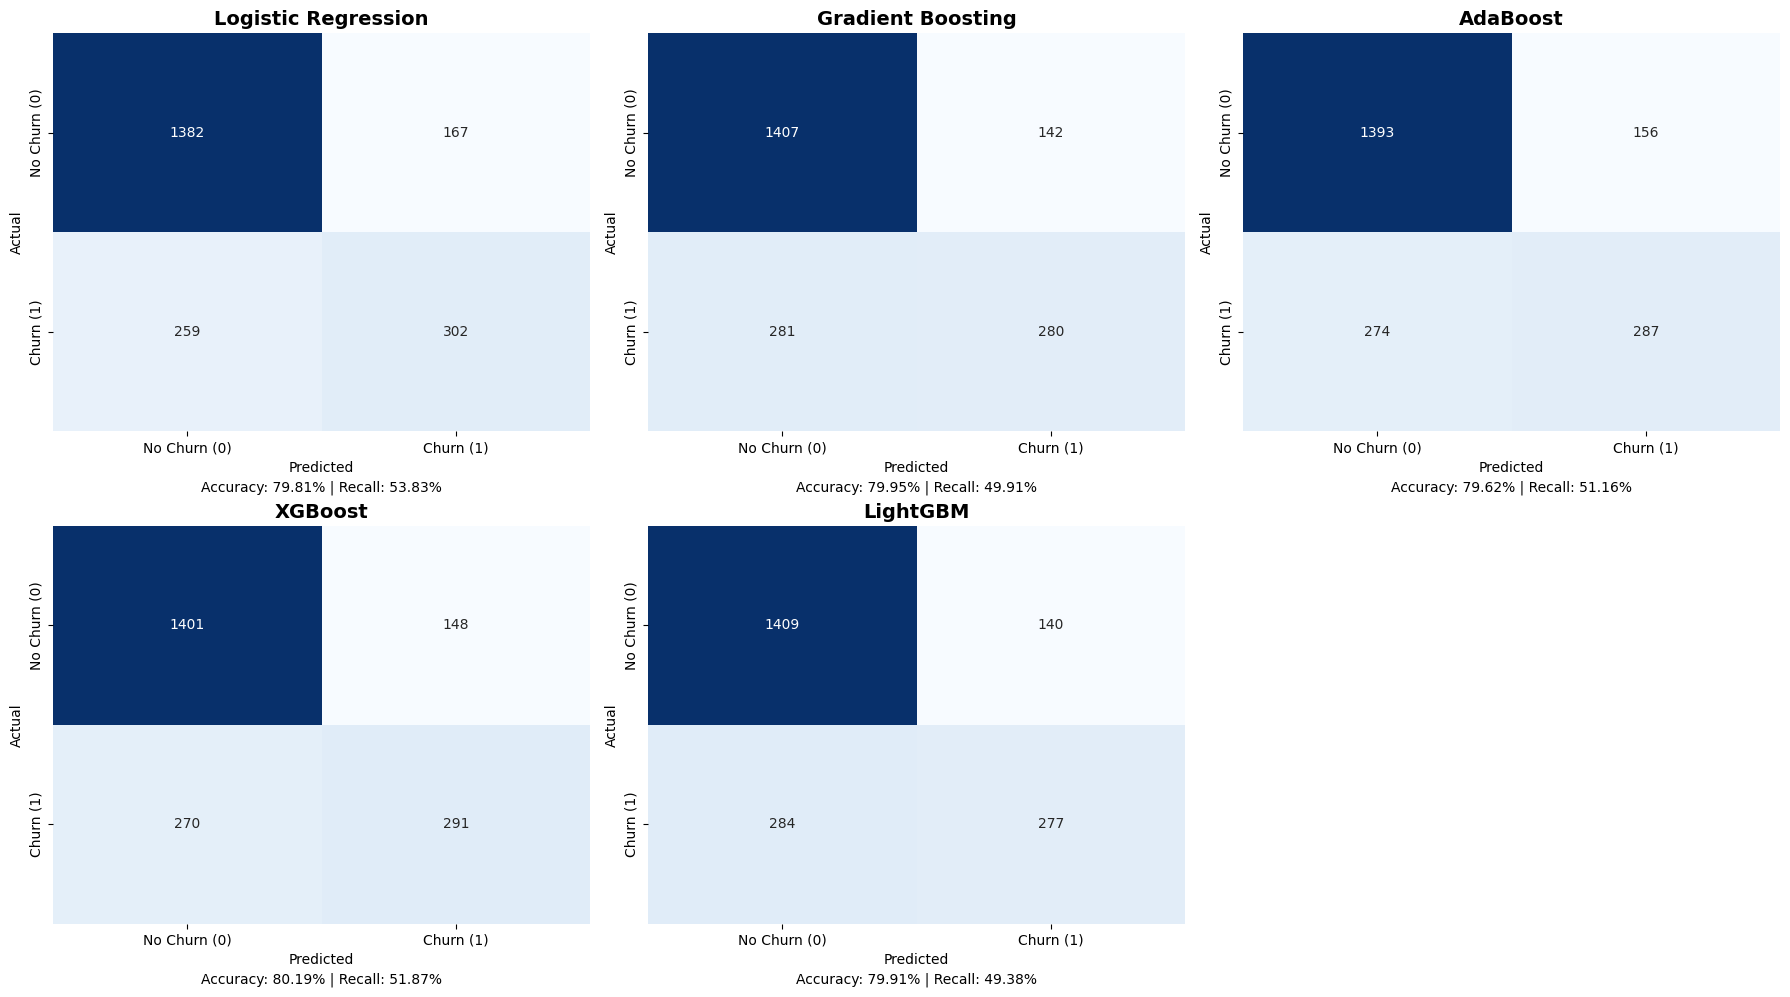

In [251]:
# Create confusion matrices for all tuned models
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Changed to 2x3 grid for 5 models
axes = axes.ravel()

model_names = list(tuned_models.keys())

for idx, model_name in enumerate(model_names):
    model = tuned_models[model_name]

    # Select appropriate data
    if model_name == 'Logistic Regression':
        X_test_used = X_test_scaled
    else:
        X_test_used = X_test_encoded

    # Predictions
    y_test_pred = model.predict(X_test_used)

    # Confusion matrix
    cm = confusion_matrix(y_test_encoded, y_test_pred)

    # Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f'{model_name}', fontsize=14, fontweight='bold')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_xticklabels(['No Churn (0)', 'Churn (1)'])
    axes[idx].set_yticklabels(['No Churn (0)', 'Churn (1)'])

    # Add metrics as text
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tn + tp) / (tn + fp + fn + tp)
    recall = tp / (tp + fn)
    axes[idx].text(0.5, -0.15, f'Accuracy: {accuracy:.2%} | Recall: {recall:.2%}',
                   transform=axes[idx].transAxes, ha='center', fontsize=10)

# Hide the extra subplot (6th space)
axes[5].axis('off')

plt.tight_layout()
plt.show()

For a real telecom company: I'd choose Gradient Boosting because:

- Best ROC-AUC (most reliable probabilities)
- Can set custom threshold to adjust recall vs precision
- Most balanced performance
- Fewest false alarms among top performers (142)

##Feature Importance

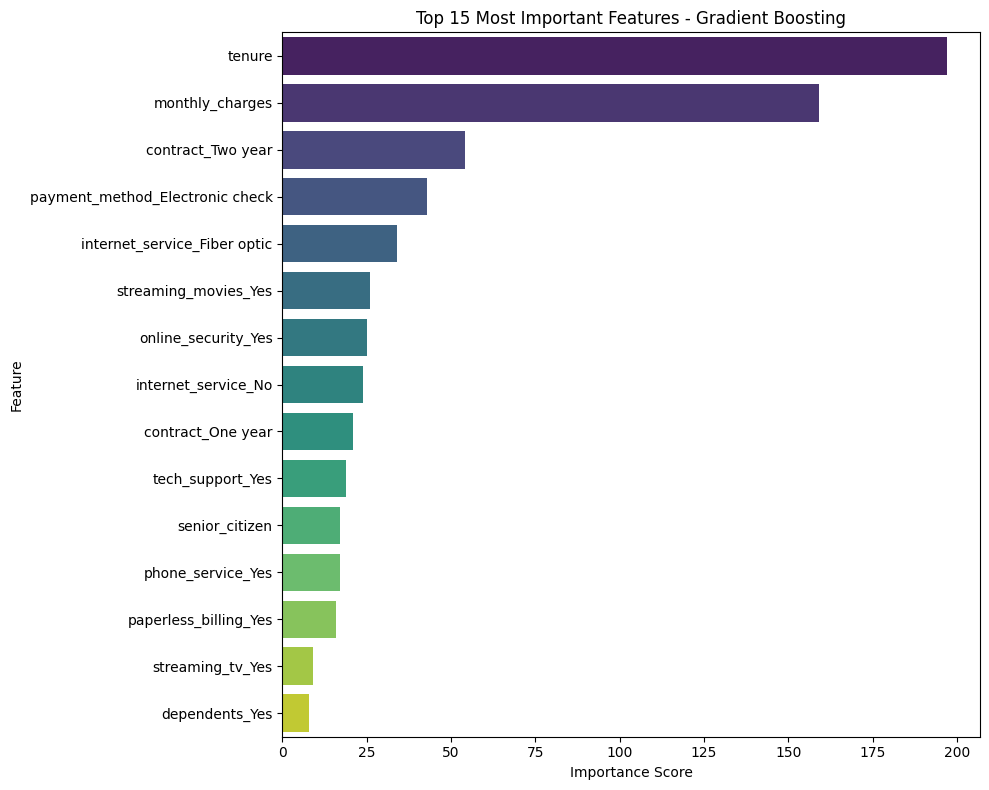

                            Feature  Importance
27                           tenure         197
28                  monthly_charges         159
21                contract_Two year          54
24  payment_method_Electronic check          43
6      internet_service_Fiber optic          34
19             streaming_movies_Yes          26
9               online_security_Yes          25
7               internet_service_No          24
20                contract_One year          21
15                 tech_support_Yes          19


In [253]:
# Feature importance for Gradient Boosting
feature_importance = best_model.feature_importances_

# Reconstruct feature names from preprocessor
feature_names = (preprocessor.named_transformers_['cat']
                 .get_feature_names_out(categorical_cols).tolist() +
                 numerical_cols)

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Most Important Features - Gradient Boosting')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print(importance_df.head(10))

##ROC Curve Comparison

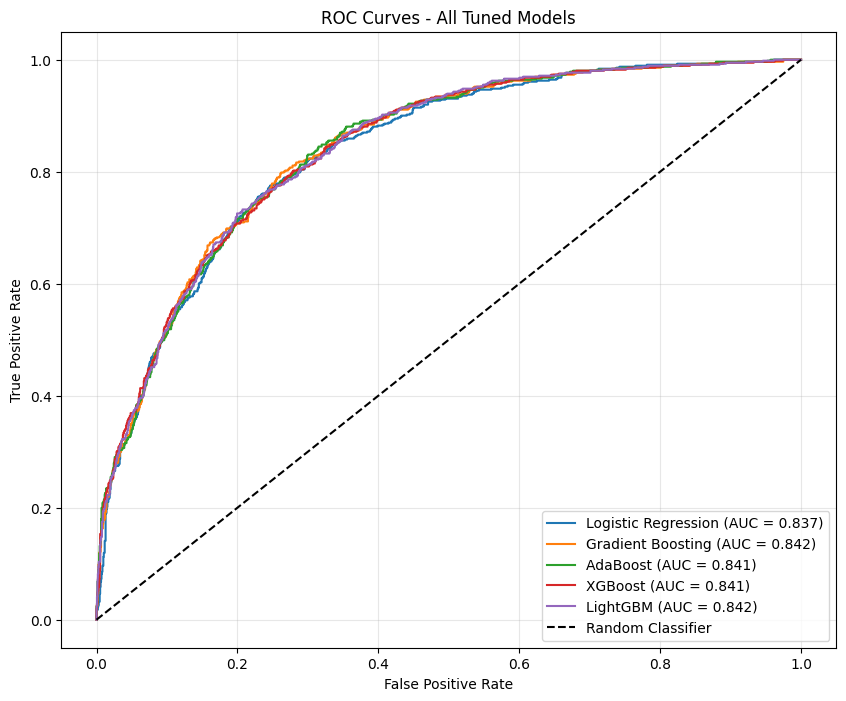

In [254]:
# Plot ROC curves for all tuned models
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for model_name in tuned_models.keys():
    model = tuned_models[model_name]
    X_test_used = X_test_scaled if model_name == 'Logistic Regression' else X_test_encoded
    y_proba = model.predict_proba(X_test_used)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_encoded, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Tuned Models')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

##Classification Report

In [255]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_test_pred,
                          target_names=['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1549
       Churn       0.66      0.49      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



Business Insights from Feature Importance:

Red Flags for Churn:

- Fiber optic internet service
- Month-to-month contract
- Low tenure (new customers)
- Electronic check payment
- No online security/tech support

Retention Strategies:

- Offer contract upgrades (month-to-month → 1 year)
- Improve fiber optic service quality or pricing
- Push automatic payments (vs electronic check)
- Bundle add-on services (online security, tech support)